In [1]:
# Hamiltonian Eigenvalues

In [2]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

$V(x) = -V_0 e^{-\alpha x^2}$

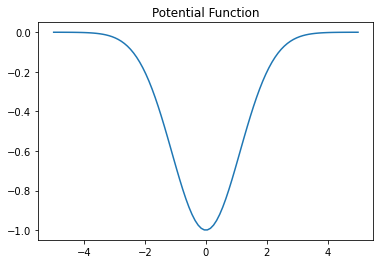

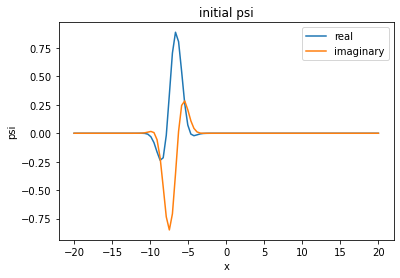

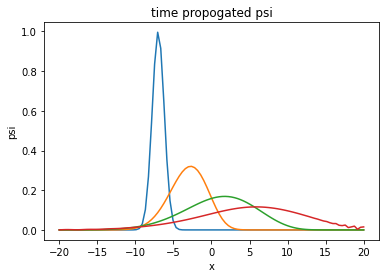

In [7]:
# declarations
n = 100
L = 5
V_0 = -1
alpha = 0.4
x = np.linspace(-L, L, n)
dx = (2*L)/n
V = np.zeros(n)
h = np.zeros((n, n))

# functions
def potential(x):
    return V_0*(np.e**(-alpha*(x**2)))

# plot potential
for i in range(0, n):
    V[i] = potential(x[i])

plt.plot(x, V)
plt.title("Potential Function")
plt.show()

# generate matrix
for i in range(0, n):
    #h[i][i] = (1/(2*(dx**2)))+V[i]
    h[i][i] = (1/(dx**2))+V[i]
    if i != n-1:
        h[i][i+1] = -1/(2*(dx**2))
    if i != 0:
        h[i][i-1] = -1/(2*(dx**2))

# inital setup

n_x = n

k = 1
x_0 = -7
r = 20
x = np.linspace(-r, r, n_x)
psi = np.empty([n_x, 1]).astype(complex)

for i in range(0, n_x):
    psi[i] = np.exp(-alpha * (x[i] - x_0)**2 + 1j * k * x[i])

plt.plot(x, psi.real, label="real")
plt.plot(x, psi.imag, label="imaginary")
plt.legend()
plt.title("initial psi")
plt.xlabel("x")
plt.ylabel("psi")
plt.show()

# time propogation

dt = 0.000005
n_t = 200000

for j in range(0, n_t):
    psi = psi + np.dot((-1j*h*dt), psi)

    if (j % 50000 == 0):
        #plt.plot(x, psi.real, label=("real t="+str((j*dt))))
        #plt.plot(x, psi.imag, label=("imag t="+str((j*dt))))
        plt.plot(x, (psi.real**2) + (psi.imag**2), label=("real t="+str((j*dt))))


plt.title("time propogated psi")
plt.xlabel("x")
plt.ylabel("psi")
plt.show()